In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Datasets_ML_AI_DL/Insurance_company_Churn_Modelling.csv')
df.head(5)
df = df.drop(["RowNumber","Surname","CustomerId"],axis=1)
df.head(1)
#df.shape

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


# Data visualization

In [11]:
from sklearn.preprocessing import LabelEncoder
geography = LabelEncoder()
gender = LabelEncoder()
df2=df
df2['Geography_n']=geography.fit_transform(df["Geography"])
df2['gender_n']=gender.fit_transform(df["Gender"])
df2.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_n,gender_n
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,0


In [12]:
print(df2.Geography_n)

0       0
1       2
2       0
3       0
4       2
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: Geography_n, Length: 10000, dtype: int64


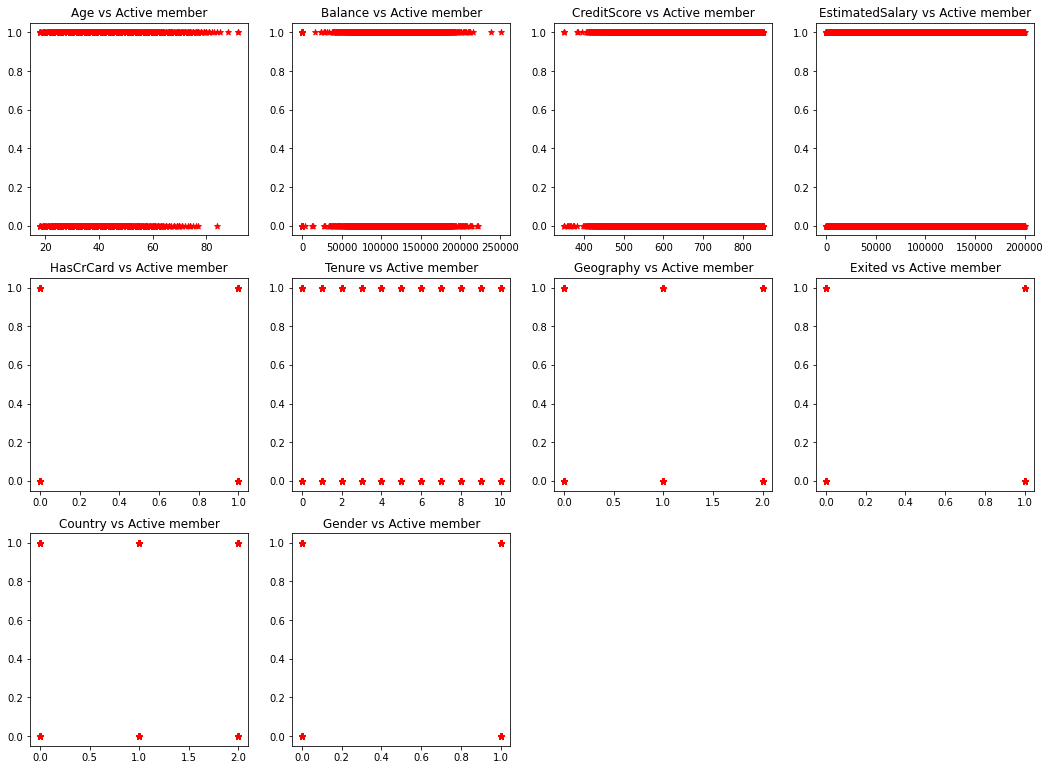

In [13]:
plt.figure(figsize=(18,18))
plt.subplot(4,4,1)
plt.title("Age vs Active member")
plt.scatter(df.Age,df.IsActiveMember ,marker='*',color='red')
plt.subplot(4,4,2)
plt.title("Balance vs Active member")
plt.scatter(df.Balance,df.IsActiveMember ,marker='*',color='red')
plt.subplot(4,4,3)
plt.title("CreditScore vs Active member")
plt.scatter(df.CreditScore,df.IsActiveMember ,marker='*',color='red')
plt.subplot(4,4,4)
plt.title("EstimatedSalary vs Active member")
plt.scatter(df.EstimatedSalary,df.IsActiveMember ,marker='*',color='red')
plt.subplot(4,4,5)
plt.title("HasCrCard vs Active member")
plt.scatter(df.HasCrCard,df.IsActiveMember ,marker='*',color='red')
plt.subplot(4,4,6)
plt.title("Tenure vs Active member")
plt.scatter(df.Tenure,df.IsActiveMember ,marker='*',color='red')
plt.subplot(4,4,7)
plt.title("Geography vs Active member")
plt.scatter(df.Geography_n,df.IsActiveMember ,marker='*',color='red')
plt.subplot(4,4,8)
plt.title("Exited vs Active member")
plt.scatter(df.Exited,df.IsActiveMember ,marker='*',color='red')
plt.subplot(4,4,9)
plt.title("Country vs Active member")
plt.scatter(df2.Geography_n,df.IsActiveMember ,marker='*',color='red')
plt.subplot(4,4,10)
plt.title("Gender vs Active member")
plt.scatter(df2.gender_n,df.IsActiveMember ,marker='*',color='red')
plt.show()

In [23]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_n,gender_n
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.746300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.827529,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,2.000000,1.000000


# Feature values extraction
We can easily detect how much significant categorical major or minor values are in dataset using a simple histogram visualization.Some features have 2,3 major values some have huge values.

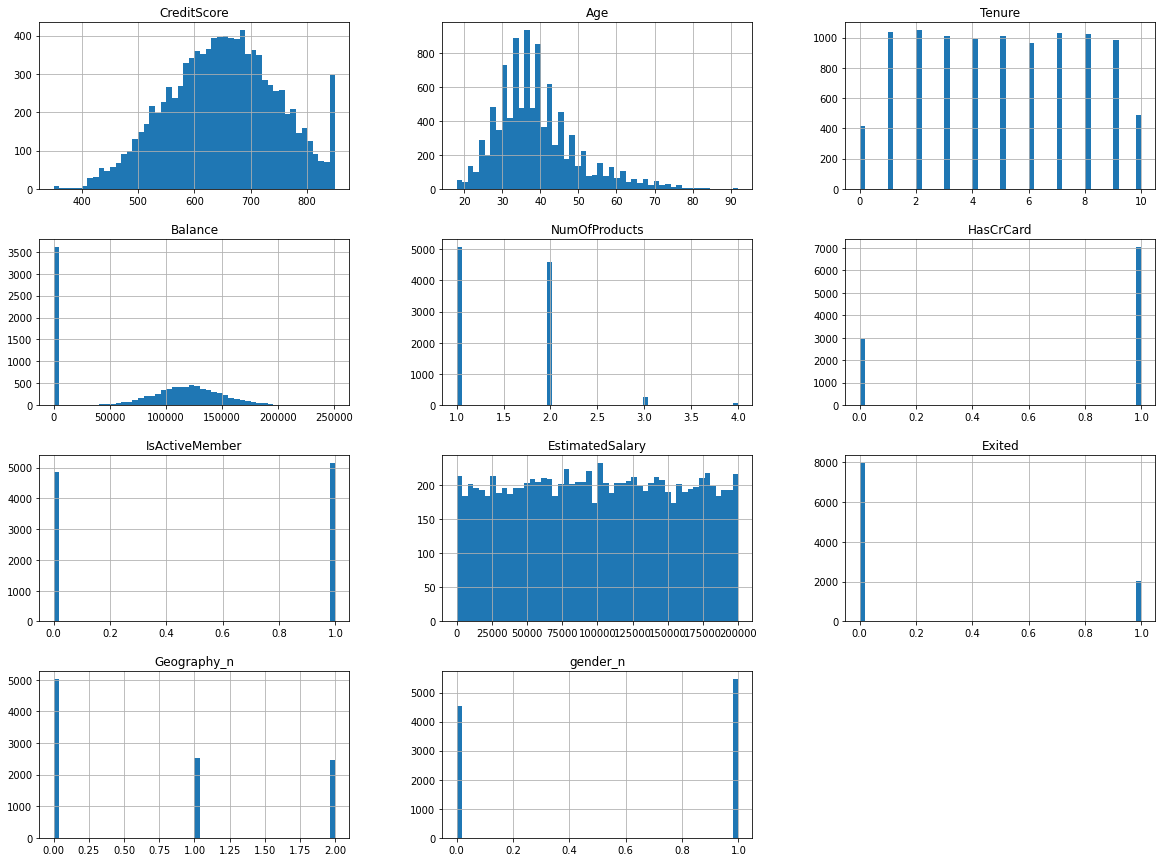

In [31]:
df2.hist(bins=50 ,figsize=(20,15))
plt.show()

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
 11  Geography_n      10000 non-null  int64  
 12  gender_n         10000 non-null  int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 1015.8+ KB


## Looking for Corelation functions

based on IsActiveMember we try to find corelation features.Positive values features are more corelated for IsActiveMember.If there value increses then IsActiveMember might be 1 .

IsActiveMember     1.000000
Age                0.085472
CreditScore        0.025651
gender_n           0.022544
NumOfProducts      0.009612
Geography_n        0.006724
Balance           -0.010084
EstimatedSalary   -0.011421
HasCrCard         -0.011866
Tenure            -0.028362
Exited            -0.156128
Name: IsActiveMember, dtype: float64


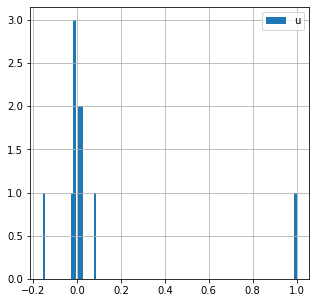

In [45]:
corr_matrix=df2.corr()
corr_matrix_sorted_values=corr_matrix['IsActiveMember'].sort_values(ascending=False)
print(corr_matrix_sorted_values)
corr_matrix_sorted_values.hist(bins=100,figsize=(5,5))
plt.legend("upper right")
plt.show()

# Finding Inactive account Tandancy based on Gender

In [14]:
gender = df2.groupby("Gender")["Gender"].count()
gender.head()

Gender
Female    4543
Male      5457
Name: Gender, dtype: int64

In [15]:
gender_array_data=gender.values
print(gender_array_data)

[4543 5457]


In [16]:
male=(gender_array_data[1]*100)/len(df2)
female=(gender_array_data[0]*100)/len(df2)
print(male)
print(female)

54.57
45.43


In [17]:
df3 = pd.DataFrame(df2, columns =['Gender','Geography','IsActiveMember' ])
df_new = df3[df3['IsActiveMember'] == 1]
df_new_gender = df_new.groupby("Gender")["Gender"].count().values
#print(df_new)
print(df_new_gender)

[2284 2867]


In [18]:
active_male = ((df_new_gender[1])*100)/5457
inactive_male =((5457-df_new_gender[1])*100)/5457
active_female = ((df_new_gender[0])*100)/4543
inactive_female =((4543-df_new_gender[0])*100)/4543
print(active_male)
print(inactive_male)

52.53802455561664
47.46197544438336


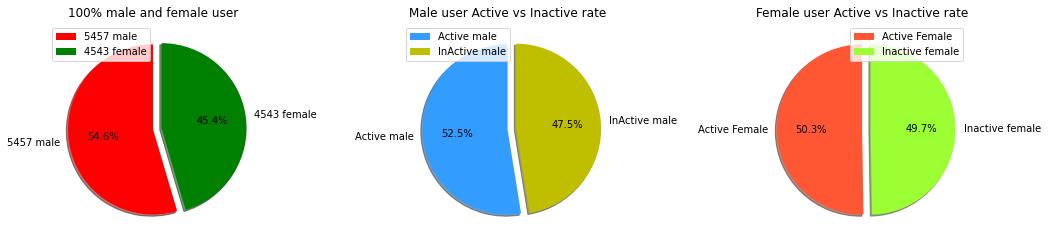

In [19]:
# defining labels
# portion covered by each label
ap1 = ['5457 male','4543 female']
ap2 = ['Active male','InActive male']
ap3 = ['Active Female','Inactive female']
slices = [male,female]
slices1 =[active_male,inactive_male]
slices2 = [active_female,inactive_female]
 # color for each label
colors = ['r', 'g']
colors2 = ['#339cff', 'y']
colors3 = ['#ff5733', '#9cff33']
# plotting the pie chart

plt.figure(figsize=(18,18))
plt.subplot(4,3,1)
plt.title("100% male and female user")
plt.pie(slices, labels = ap1, colors=colors,
        startangle=90, shadow = True, explode = (0,0.1),
        radius = 1.0, autopct = '%1.1f%%')
# plotting legend
plt.legend()
plt.subplot(4,3,2)
plt.title("Male user Active vs Inactive rate")
plt.pie(slices1, labels = ap2, colors=colors2,
        startangle=90, shadow = True, explode = (0,0.1),
        radius = 1.0, autopct = '%1.1f%%')
# plotting legend
plt.legend()
plt.subplot(4,3,3)
plt.title("Female user Active vs Inactive rate")
plt.pie(slices2, labels = ap3, colors=colors3,
        startangle=90, shadow = True, explode = (0,0.1),
        radius = 1.0, autopct = '%1.1f%%')
# plotting legend
plt.legend()
# showing the plot
plt.show()

# Finding Inactive account Tandancy according to Geography(Country)

In [ ]:
df3.head()

In [20]:
geography_old_data = df3.groupby("Geography")["Geography"].count()
#geography_old_data
france_total = geography_old_data[0]
germany_total= geography_old_data [1]
spain_total = geography_old_data[2]
print(geography_old_data[0])

5014


In [21]:

geography_new_data = df_new.groupby("Geography")["Geography"].count().values
#geography_new_data
france_new_active = geography_new_data[0]
france_new_inactive =france_total -france_new_active
germany_new_active= geography_new_data [1]
germany_new_inactive=germany_total-germany_new_active
spain_new_active = geography_new_data[2]
spain_new_inactive=spain_total-spain_new_active
print(france_new_inactive)

2423


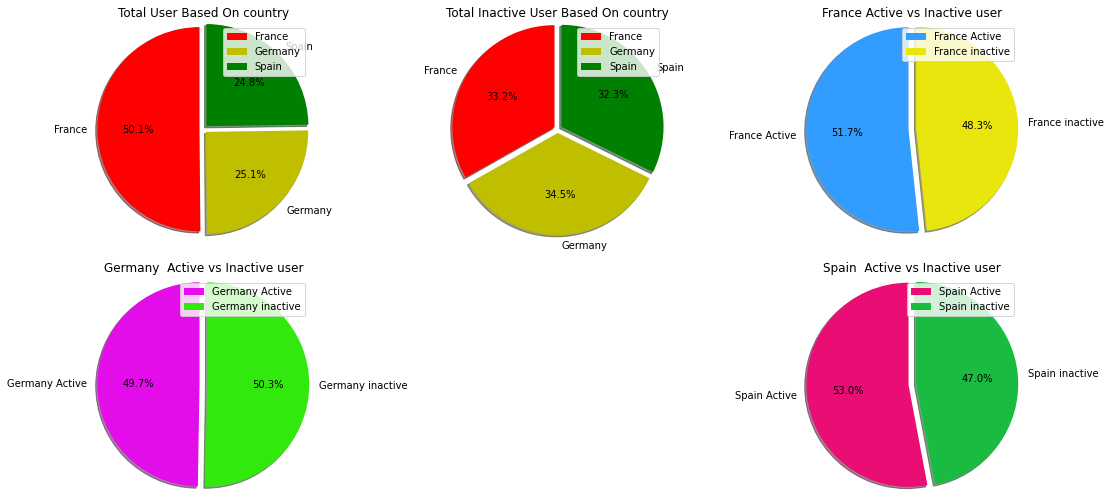

In [22]:
import matplotlib.pyplot as plt
 
# defining labels
activities = ['France', 'Germany', 'Spain']
activities02 = ['France Active', 'France inactive']
activities03 = ['Germany Active', 'Germany inactive']
activities04 = ['Spain Active', 'Spain inactive']
activities05 = ['France', 'Germany', 'Spain']
 
# portion covered by each label
slices = [france_total, germany_total,spain_total]
slices02 = [(france_new_active*100)/france_total,(france_new_inactive*100)/france_total]
slices03 = [germany_new_active/100,germany_new_inactive/100]
slices04 = [spain_new_active/100,spain_new_inactive/100]
slices05 = [(france_new_inactive*100)/france_total, (germany_new_inactive*100)/germany_total,(spain_new_inactive*100)/spain_total]

# color for each label
colors = ['r', 'y', 'g']
colors02 = ['#339cff', '#e9e60d']
colors03 = ['#e20de9', '#32e90d']
colors04 = ['#e90d74', '#19bb40']
colors05 = ['r', 'y', 'g']
 
# plotting the pie chart
plt.figure(figsize=(18,18))
plt.subplot(4,3,1)
plt.title("Total User Based On country")
plt.pie(slices, labels = activities, colors=colors,
        startangle=90,shadow = True, explode = (0.045,0.045,0.05),
        radius = 1.2, autopct = '%1.1f%%')
# plotting legend
plt.legend()

plt.subplot(4,3,2)
plt.title("Total Inactive User Based On country")
plt.pie(slices05, labels = activities05, colors=colors05,
        startangle=90,shadow = True, explode = (0.045,0.045,0.05),
        radius = 1.2, autopct = '%1.1f%%')
# plotting legend
plt.legend()

plt.subplot(4,3,3)
plt.title("France Active vs Inactive user")
plt.pie(slices02, labels = activities02, colors=colors02,
        startangle=90,shadow = True, explode = (0.045,0.045),
        radius = 1.2, autopct = '%1.1f%%')
# plotting legend
plt.legend()


plt.subplot(4,3,4)
plt.title("Germany  Active vs Inactive user")
plt.pie(slices03, labels = activities03, colors=colors03,
        startangle=90,shadow = True, explode = (0.045,0.045),
        radius = 1.2, autopct = '%1.1f%%')
# plotting legend
plt.legend()


plt.subplot(4,3,6)
plt.title("Spain  Active vs Inactive user")
plt.pie(slices04, labels = activities04, colors=colors04,
        startangle=90,shadow = True, explode = (0.045,0.045),
        radius = 1.2, autopct = '%1.1f%%')
# plotting legend
plt.legend()
# showing the plot
plt.show()

# AI modelling()

i)Logistic regression
ii)Decision Tree
iii)Random Forest
iv)

## Split data into X and Y

In [60]:
from sklearn.model_selection import train_test_split
#df2.info()
X=df2.drop(["Geography","Gender","Exited","IsActiveMember"],axis=1)
Y=df2["IsActiveMember"]

0       1
1       1
2       0
3       0
4       1
       ..
9995    0
9996    1
9997    1
9998    0
9999    0
Name: IsActiveMember, Length: 10000, dtype: int64


In [109]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.996,test_size=0.004)
print(y_test.values)
print(y_test.shape)

[1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1
 1 1 0]
(40,)


## `1.Linear regression Tree`

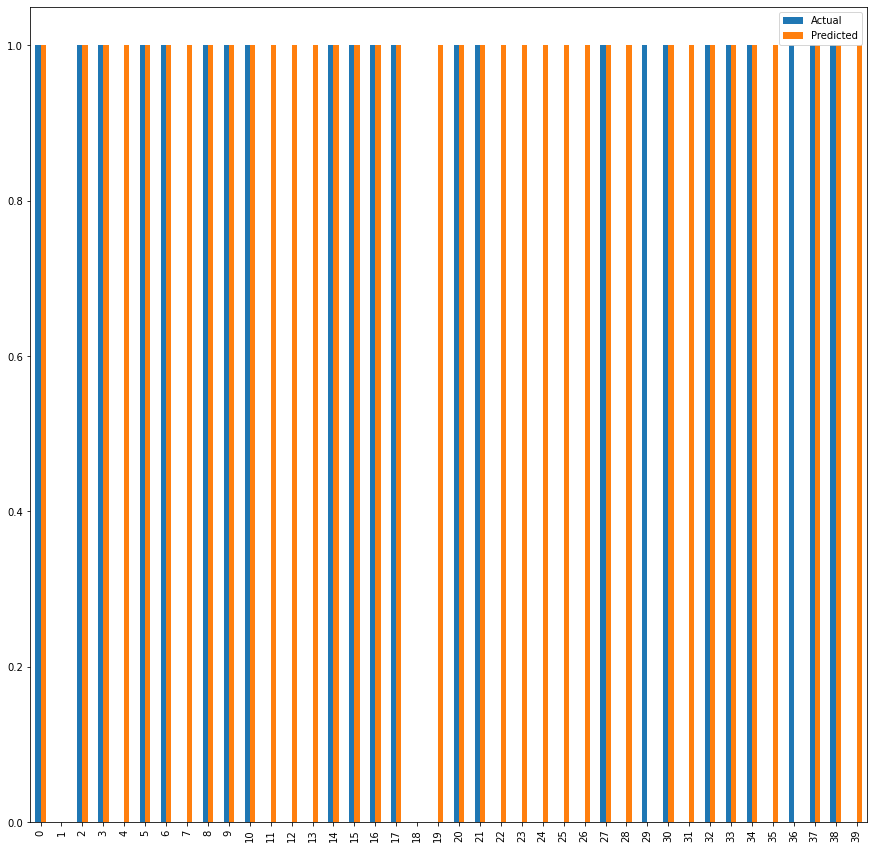

In [111]:
from sklearn.linear_model import LinearRegression,LogisticRegression
import pandas as pd
LRmodel = LogisticRegression()
LRmodel.fit(x_train,y_train)
lrpredict = LRmodel.predict(x_test)
#print(lrpredict)
ytest_val=y_test.values
ytest_val
df_ed = pd.DataFrame({'Actual': ytest_val.flatten(), 'Predicted': lrpredict.flatten()})
df_ed.plot(kind='bar',figsize=(15,15))
plt.show()

Let's find Errors\
Displaying errors\
Displaying errors

In [114]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

LMe=metrics.mean_absolute_error(y_test, lrpredict)
LMse=metrics.mean_squared_error(y_test, lrpredict)
LRMse=np.sqrt(metrics.mean_squared_error(y_test,lrpredict))
Lrt=metrics.r2_score(y_test,lrpredict)
LaccuracyScore = LRmodel.score (x_test,y_test)

print([LMe,LMse,LRMse,Lrt,LaccuracyScore])

[0.425, 0.425, 0.6519202405202649, -0.7391304347826086, 0.575]


## `2.Decision Tree`

In [116]:
from sklearn import tree
#Decission Trees
DTmodel = tree.DecisionTreeClassifier()
#Page 4 of 6
DTmodel.fit(x_train, y_train)
# testing
model_predictions = DTmodel.predict(x_test)
# accuracy of prediction
DMe = metrics.mean_absolute_error(y_test, model_predictions)
Dmse = metrics.mean_squared_error(y_test, model_predictions)
Dmsqt = np.sqrt(metrics.mean_squared_error(y_test,model_predictions))
Drt=metrics.r2_score(y_test,model_predictions)
DaccuracyScore = accuracy_score(y_test, model_predictions)
print([DMe,Dmse,Dmsqt,Drt,DaccuracyScore])

[0.6, 0.6, 0.7745966692414834, -1.4552429667519182, 0.4]


## `3.SVM`

In [118]:
from sklearn.svm import SVC

SVM_model = SVC()
SVM_model.fit(x_train, y_train)
svm_prediction = SVM_model.predict(x_test)
svm_me = metrics.mean_absolute_error(y_test, svm_prediction)
svm_mse = metrics.mean_squared_error(y_test, svm_prediction)
svm_msqt = np.sqrt(metrics.mean_squared_error(y_test,svm_prediction))
svm_rt=metrics.r2_score(y_test,svm_prediction)
svm_accuracyScore = accuracy_score(y_test,svm_prediction)
print([svm_me,svm_mse,svm_msqt,svm_accuracyScore])

[0.425, 0.425, 0.6519202405202649, 0.575]


## `4.Random Forest Tree`

In [119]:
from sklearn.ensemble import RandomForestClassifier

RFC_model = RandomForestClassifier()
RFC_model.fit(x_train, y_train)
RFC_prediction = RFC_model.predict(x_test)
RFC_me = metrics.mean_absolute_error(y_test, RFC_prediction)
RFC_mse = metrics.mean_squared_error(y_test, RFC_prediction)
RFC_msqt = np.sqrt(metrics.mean_squared_error(y_test,RFC_prediction))
RFC_rt=metrics.r2_score(y_test,RFC_prediction)
RFC_accuracyScore = accuracy_score(y_test,RFC_prediction)
print([RFC_me,RFC_mse,RFC_msqt,RFC_accuracyScore])

[0.425, 0.425, 0.6519202405202649, 0.575]


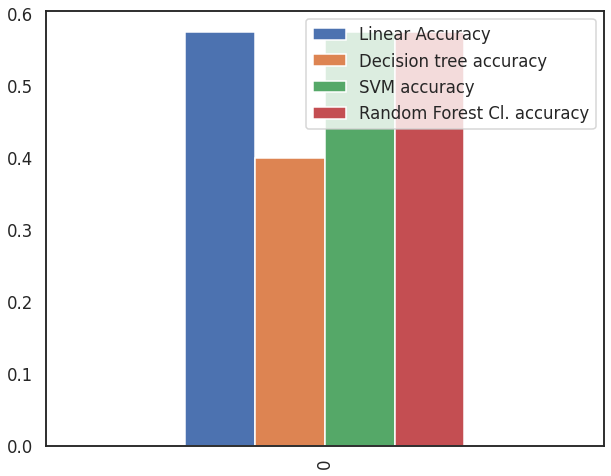

In [137]:
x = [LaccuracyScore,DaccuracyScore,svm_accuracyScore,RFC_accuracyScore]
df_acc_plot = pd.DataFrame({'Linear Accuracy': x[0].flatten(), 'Decision tree accuracy': x[1].flatten(),'SVM accuracy': x[2].flatten(),'Random Forest Cl. accuracy': x[2].flatten()})
df_acc_plot.plot(kind='bar',figsize=(10,8))
plt.show()